In [7]:
import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time
import django.template.backends.jinja2

# Vaccination accross the world 

In [8]:
#ein impfstoff aber, hat keiner Nationalität 

# Supress Scientific notation in python
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display all columns of long dataframe
pd.set_option('display.max_columns', None)

# open cohort

vax_path='vaccinations.csv'
vax=pd.read_csv(vax_path)
#print(vax)


Romania=vax[vax.country=='Romania']
Germany=vax[vax.country=='Germany']

In [9]:
#parse index
vax['date']=pd.to_datetime(vax['date'], infer_datetime_format=True)
indexeddf=vax.set_index(['date'])
#print(indexeddf)

#parsing to time format and extracting dates 
x=vax['date']=pd.to_datetime(vax['date'], format='%d-%m-%y')

Day=vax['date'].dt.day_name()
Month=vax['date'].dt.month_name()
Year=vax['date'].dt.year

# subsetting and adding month days columns

In [10]:

vax['Year']=vax['date'].dt.year
vax['Month']=vax['date'].dt.month_name()
vax['Day']=vax['date'].dt.day_name()
#print(vax)

In [11]:


def get_month(x):
    return dt.datetime (x.year, x.month, 1)

vax['VaxedMonth']=vax['date'].apply(get_month)
grouping=vax.groupby('iso_code')['VaxedMonth']
vax['CohortMonth']=grouping.transform('min')

# Calculate time offsets

In [12]:

def get_month_int(cohortframe, column):
    """function to generate date columns"""
    year=cohortframe[column].dt.year
    month=cohortframe[column].dt.month
    day=cohortframe[column].dt.day
    return year, month, day

#call function 
vaxed_year, vaxed_month, vaxed_day_=get_month_int(vax,'VaxedMonth')
cohort_year, cohort_month,cohort_day_=get_month_int(vax,'CohortMonth')

#create year an month diffs
year_diff=vaxed_year-cohort_year
month_diff=vaxed_month-cohort_month


# Create cohortindex

In [14]:

vax['CohortIndex']=year_diff * 12 + month_diff +1 

# Counting monthly cohorts

In [15]:
grouping = vax.groupby(['VaxedMonth', 'CohortIndex'])
cohort_data = grouping['iso_code'].apply(pd.Series.nunique)

#return number of unique vals
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='VaxedMonth', columns='CohortIndex', values='iso_code')
print(cohort_counts)

CohortIndex     1     2     3     4
VaxedMonth                         
2020-12-01  45.00   nan   nan   nan
2021-01-01  40.00 45.00   nan   nan
2021-02-01  46.00 38.00 45.00   nan
2021-03-01  12.00 40.00 33.00 45.00


# Mean monthly cohorts for fully vaccinated people around the world

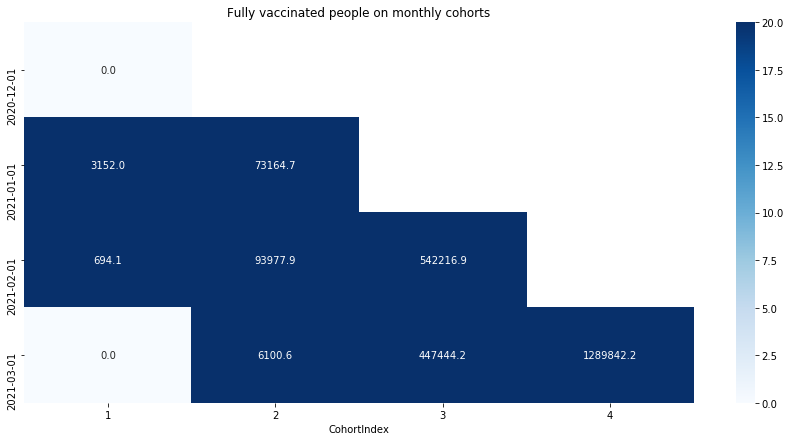

In [17]:
grouping = vax.groupby(['VaxedMonth', 'CohortIndex'])
cohort_data = grouping['people_fully_vaccinated'].mean()
cohort_data=cohort_data.reset_index()
avg_q=cohort_data.pivot(index='VaxedMonth', columns='CohortIndex', values='people_fully_vaccinated')
avg_q.round(1)
avg_q.index=avg_q.index.date

plt.figure(figsize=(15,7))
plt.title('Fully vaccinated people on monthly cohorts')
sns.heatmap(data=avg_q, annot=True, vmin=0.0,  fmt = '.1f', vmax=20, cmap='Blues')
plt.show()


# Cohorts based on vaccines

If the previous cohort analysis was based on "iso-code", now the cohort is based on vaccine scheme

In [19]:
#count monthly cohs

grouping = vax.groupby(['VaxedMonth', 'CohortIndex'])
cohort_data_v = grouping['vaccines'].apply(pd.Series.nunique)

#return number of unique vals
cohort_data_v = cohort_data_v.reset_index()
cohort_counts = cohort_data_v.pivot(index='VaxedMonth', columns='CohortIndex', values='vaccines')
print(cohort_counts)

CohortIndex     1     2     3     4
VaxedMonth                         
2020-12-01  13.00   nan   nan   nan
2021-01-01  15.00 13.00   nan   nan
2021-02-01  16.00 13.00 13.00   nan
2021-03-01   3.00 16.00 13.00 13.00


# Heatmap showing the cohort 

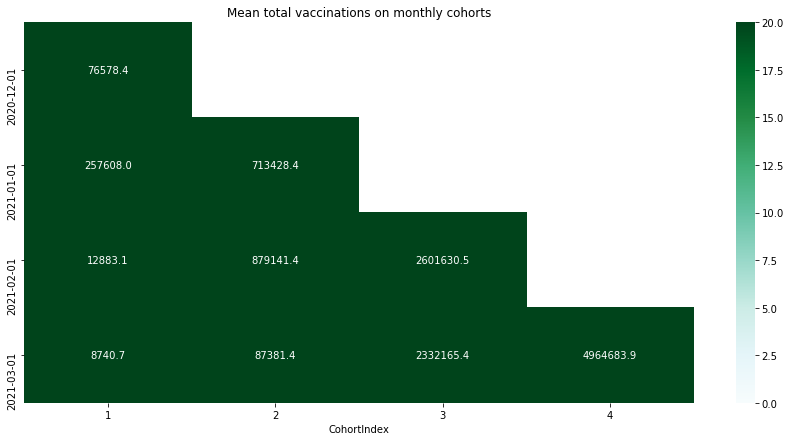

In [21]:
grouping = vax.groupby(['VaxedMonth', 'CohortIndex'])
cohort_data_v = grouping['total_vaccinations'].mean()
cohort_data_v=cohort_data_v.reset_index()
avg_q=cohort_data_v.pivot(index='VaxedMonth', columns='CohortIndex', values='total_vaccinations')
avg_q.round(1)
avg_q.index=avg_q.index.date

plt.figure(figsize=(15,7))
plt.title('Mean total vaccinations on monthly cohorts')
sns.heatmap(data=avg_q, annot=True, vmin=0.0,  fmt = '.1f', vmax=20, cmap='BuGn')
plt.show()

# Pie chart showing fully vaccinated people 

First 15 world countries that have fully vaccinated their people 

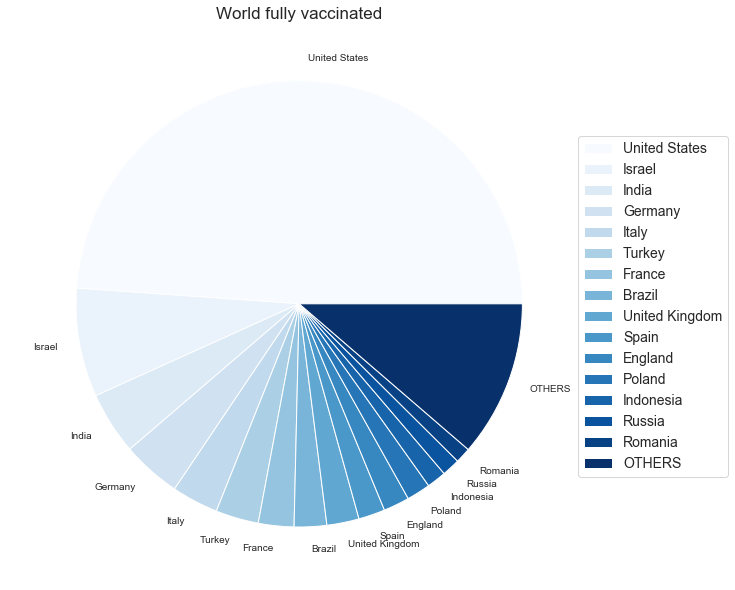

In [22]:
sns.set_style("whitegrid")
df = vax.groupby('country').agg({'people_fully_vaccinated': 'sum'}).sort_values('people_fully_vaccinated', ascending=False)

OTHERS = df.iloc[15:].sum()
df.drop(df.iloc[15:].index.tolist(), inplace=True)
df.loc['OTHERS'] = OTHERS


ax = df.plot.pie(y='people_fully_vaccinated', figsize=(10,20), colormap='Blues')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.0, 0.8), loc=2, borderaxespad=0., fontsize=14)
plt.ylabel(' ')
plt.title('World fully vaccinated', fontsize=17)
plt.show()

# Vaccine schema distribution

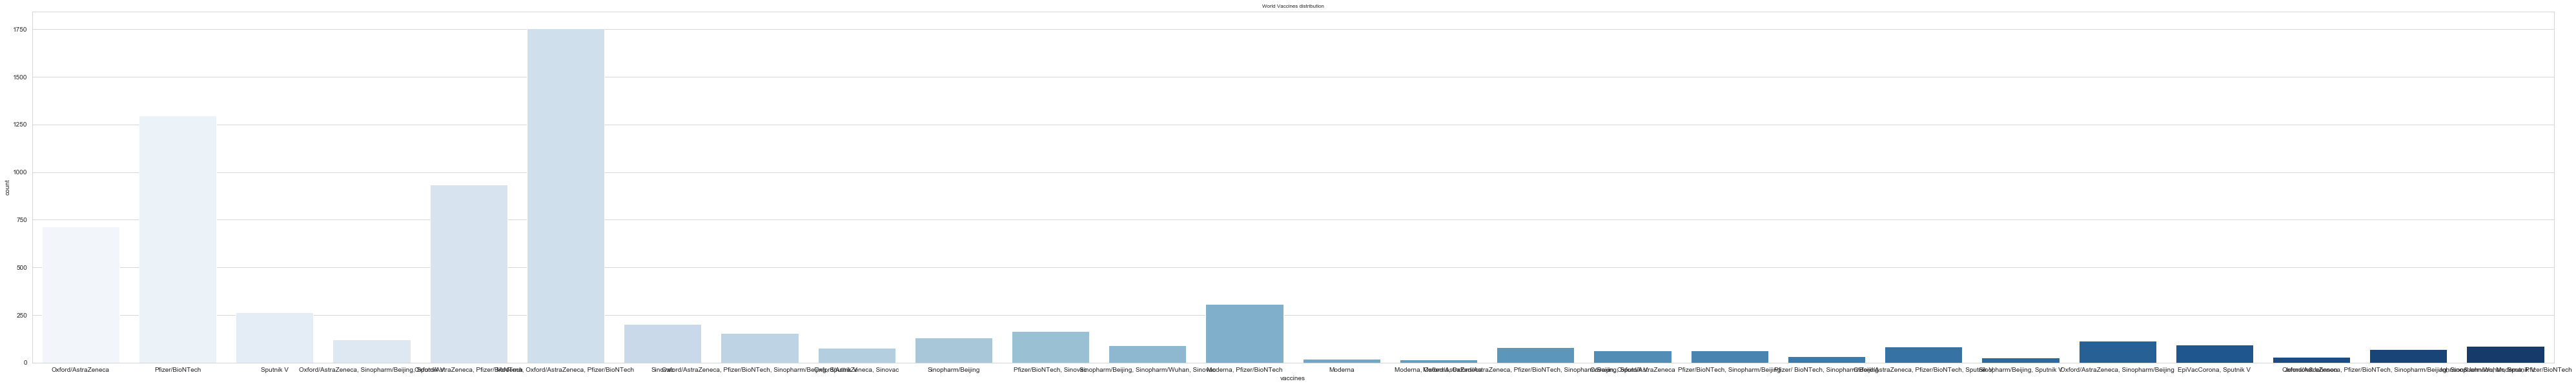

In [23]:
# distribution bar

plt.rcParams['figure.figsize'] = (70, 10)
sns.countplot(vax['vaccines'], palette = 'Blues')
plt.title('World Vaccines distribution', fontsize = 8)
plt.show()

# Value count index

In [24]:
vaccine_order = vax['vaccines'].value_counts().index
country_order = vax['country'].value_counts().index

# Group vaccine count per month

In [28]:
v_counts = vax.groupby(['vaccines', 'Month']).size()
v_counts = v_counts.reset_index(name='sum')
v_counts = v_counts.pivot(index = 'vaccines', columns = 'Month', values = 'sum')
v_counts.head()

Month,December,February,January,March
vaccines,,,,
"Covaxin, Oxford/AstraZeneca",nan,28.00,17.00,17.00
"EpiVacCorona, Sputnik V",17.00,28.00,31.00,17.00
Johnson&Johnson,nan,13.00,nan,17.00
"Johnson&Johnson, Moderna, Pfizer/BioNTech",12.00,28.00,31.00,17.00
Moderna,nan,4.00,nan,16.00


# Heatmap showing vaccine scheme count per month 

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

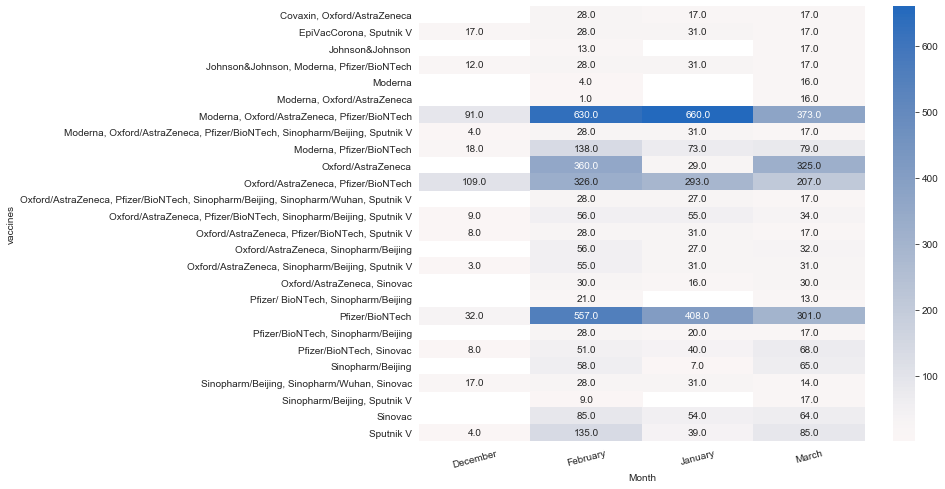

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(v_counts, annot = True, fmt = '.1f', cmap = 'vlag_r', center = 0)
plt.xticks(rotation=15)

In [30]:
va_counts = vax.groupby(['people_vaccinated', 'Month']).size()
va_counts = va_counts.reset_index(name='count')
va_counts = va_counts.pivot(index = 'people_vaccinated', columns = 'Month', values = 'count')
va_counts.head()

Month,December,February,January,March
people_vaccinated,,,,
0,194.00,1360.00,911.00,704.00
5,1.00,nan,nan,nan
13,1.00,nan,nan,nan
18,nan,1.00,nan,nan
20,nan,1.00,nan,nan


# Contingency table showing no of fully vaccinated people in Germany using Pfeizer, Moderna and Zeneca schema

Data was filtered by country - Germany

In [34]:
#filter for Germany
Germany=vax[vax.country=='Germany']

#create contingency colormap
hourly=['iso_code', 'vaccines']
cm=sns.colormap='Blues'
pd.crosstab(Germany[hourly[0]], Germany[hourly[1]], values=Germany['people_fully_vaccinated'], margins=False, aggfunc='sum').fillna(0).style.background_gradient(cmap=cm)

vaccines,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
iso_code,
DEU,86226307


In [35]:
#filter for Germany
Romania=vax[vax.country=='Romania']

#create contingency colormap
hourly=['iso_code', 'vaccines']
cm=sns.colormap='Blues'
pd.crosstab(Romania[hourly[0]], Romania[hourly[1]], values=Romania['people_fully_vaccinated'], margins=False, aggfunc='sum').fillna(0).style.background_gradient(cmap=cm)

vaccines,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
iso_code,
ROU,22634382


# Vaccine data for EU countries

In [36]:
vax_path='EU_vaccs.csv'
vax_eu=pd.read_csv(vax_path)
#print(vax_eu)


# Datetime indexing

In [37]:
#parse index
vax_eu['date']=pd.to_datetime(vax_eu['date'], infer_datetime_format=True)
indexeddf=vax_eu.set_index(['date'])
#print(indexeddf)

# Parsing to time format and extracting dates with format

In [38]:


x=vax_eu['date']=pd.to_datetime(vax_eu['date'], format='%d-%m-%y')

Day=vax_eu['date'].dt.day_name()
Month=vax_eu['date'].dt.month_name()
Year=vax_eu['date'].dt.year

#subsetting 
vax_eu['Year']=vax_eu['date'].dt.year
vax_eu['Month']=vax_eu['date'].dt.month_name()
vax_eu['Day']=vax_eu['date'].dt.day_name()
#print(vax_eu)

Indexing count

In [39]:
vaccine_order = vax_eu['vaccines'].value_counts().index
country_order = vax_eu['country'].value_counts().index

In [40]:
va_counts = vax_eu.groupby(['people_vaccinated', 'country']).size()
va_counts = va_counts.reset_index(name='count')
va_counts = va_counts.pivot(index = 'people_vaccinated', columns = 'country', values = 'count')
va_counts.head()

country,France,Germany,Luxembourg,Netherlands,Romania
people_vaccinated,,,,,
0,nan,nan,30.00,49.00,nan
13,1.00,nan,nan,nan,nan
52,1.00,nan,nan,nan,nan
138,1.00,nan,nan,nan,nan
237,1.00,nan,nan,nan,nan


# Correlation map showing relationships betwen vaccines and individuals 

The darker the colour the stronger the relationship between variables - people fully vaccinated is normally correlated with daily vaccinations but strstrongly correlated.

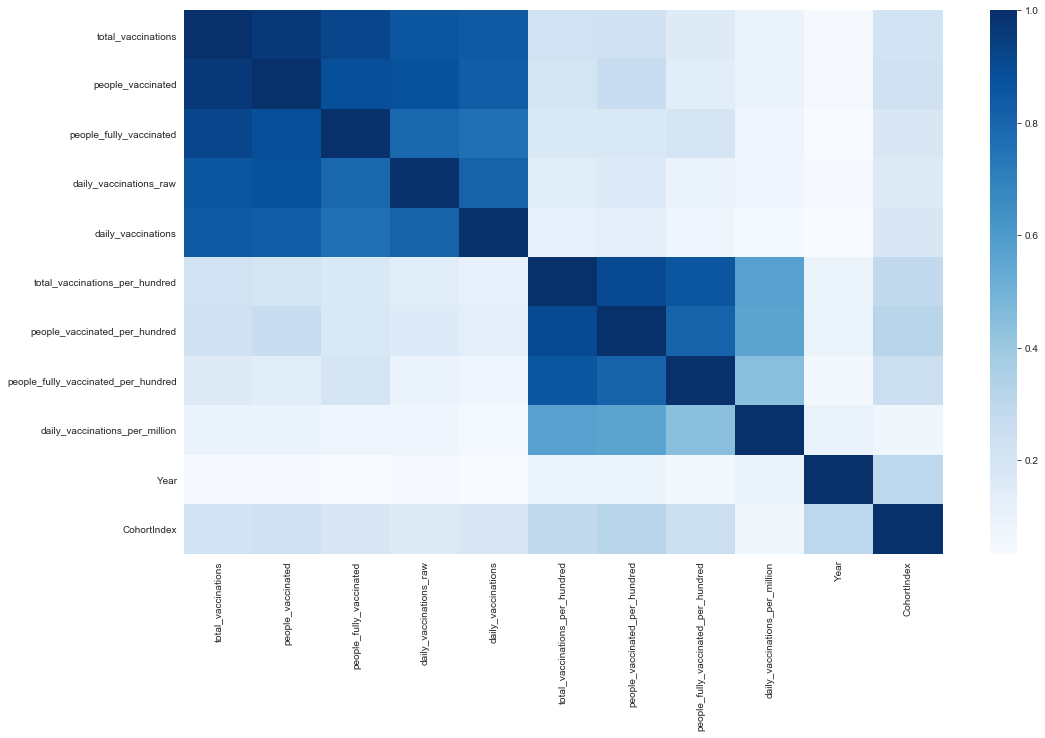

In [41]:

plt.figure(figsize=(17,10))
sns.heatmap(vax.corr(),cmap='Blues')
plt.show()


# Treemap on vaccine scheme

In [42]:
fig = px.treemap(vax, path = ['vaccines', 'country'], values = 'people_fully_vaccinated', color_continuous_scale="Teal",
                title="Fully vaccinated per country grouped by vaccine scheme")

plotly.offline.plot(fig, filename='v')

C:\Users\sf\AppData\Local\Programs\Python\Python38-32\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `v` didn't end with .html. Adding .html to the end of your file.



'v.html'

In [43]:
fig = px.treemap(vax, path = ['vaccines', 'country'], values = 'total_vaccinations', color_continuous_scale="Teal",
                title="Total vaccinations by country by vaccination scheme")

plotly.offline.plot(fig, filename='v')

'v.html'